<a href="https://colab.research.google.com/github/parsabarghi/House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### California House Price Prediction


In [ ]:
# import necesery library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Reading Data

In [ ]:
# read data
df = pd.read_csv("./housing.csv")

In [ ]:
# get some information from data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Drop Missing Or Nan Values

In [ ]:
# as you can see we have some misssing value in "total bedroom". we should drop that.
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


## Allocate Data

# x = general information
# y = answers

In [ ]:
# allocate data to general information and answers
x = df.drop(["median_house_value"], axis=1)
y = df["median_house_value"]

In [ ]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


## Change Objects To Float

In [ ]:
# as you can see we have object in ocean proximity
# we should change that to int
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
# change ocean_proximty to numerical and 5 columns
df = df.join(pd.get_dummies(df['ocean_proximity'])).drop(['ocean_proximity'], axis=1)

In [ ]:
df['<1H OCEAN'] = df['<1H OCEAN'] * 1
df['INLAND'] = df['<1H OCEAN'] * 1
df['ISLAND'] = df['<1H OCEAN'] * 1
df['NEAR BAY'] = df['<1H OCEAN'] * 1
df['NEAR OCEAN'] = df['<1H OCEAN'] * 1

In [ ]:
# allocate data to general information and answers
x = df.drop(["median_house_value"], axis=1)
y = df["median_house_value"]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   <1H OCEAN           20433 non-null  uint8  
 10  INLAND              20433 non-null  uint8  
 11  ISLAND              20433 non-null  uint8  
 12  NEAR BAY            20433 non-null  uint8  
 13  NEAR OCEAN          20433 non-null  uint8  
dtypes: float64(9), uint8(5)
memory usage: 2.2 MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >, <Axes: >]],
      dtype=object)

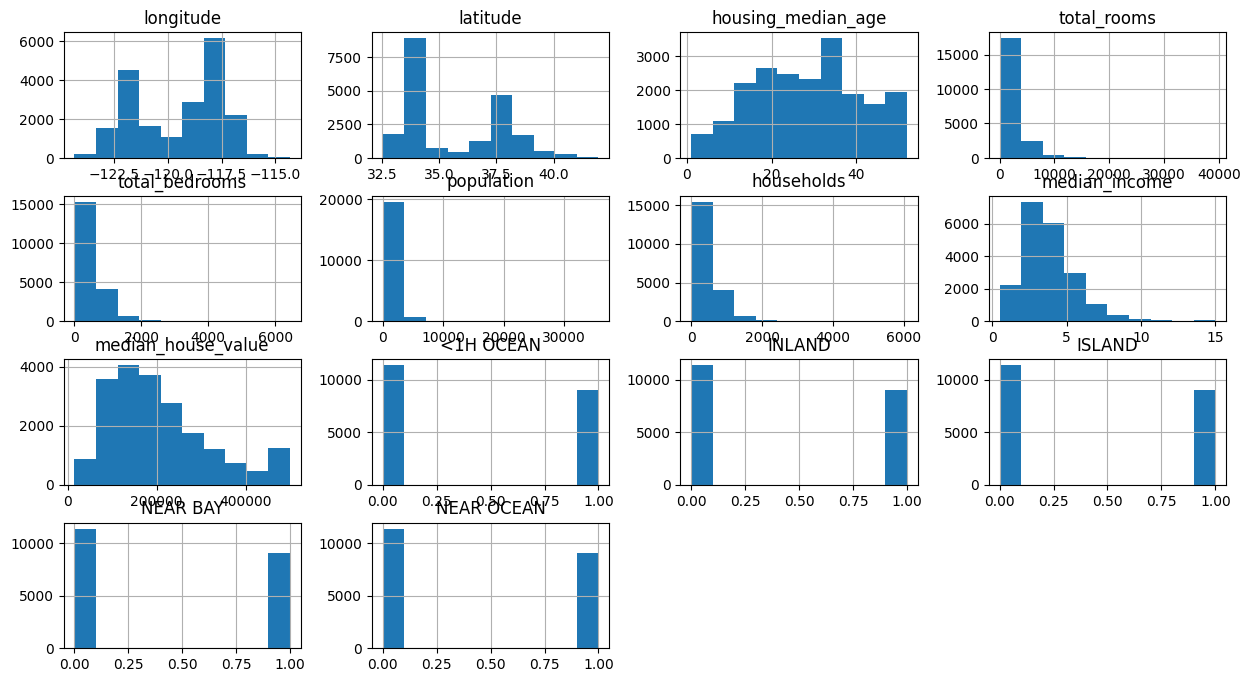

In [ ]:
# analys data with histogram
df.hist(figsize=(15,8))

<Axes: >

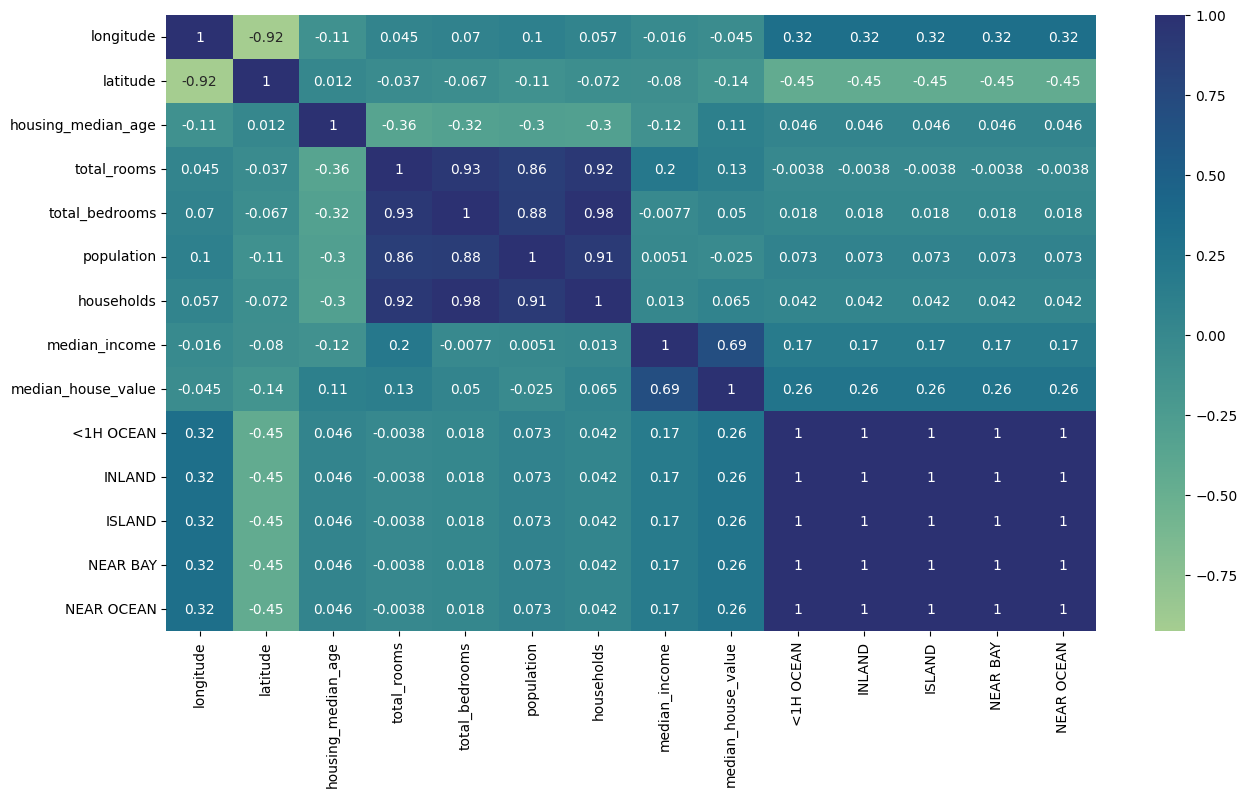

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap= 'crest')

In [ ]:
# make better the feature
df['total_bedrooms'] = np.log(df['total_bedrooms'] + 1)
df['total_rooms'] = np.log(df['total_rooms'] + 1)
df['population'] = np.log(df['population'] + 1)
df['households'] = np.log(df['households'] + 1)

In [ ]:
# adding new feature
df["bedrooms_households"] = df["total_bedrooms"] / df["households"]
df["rooms_households"] = df["total_rooms"] / df["households"]
df["households_mage"] = df["households"] / df["housing_median_age"]
df["mage_household"] = df["housing_median_age"] / df["households"]

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedrooms_households,rooms_households,households_mage,mage_household
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0,0,0,0,0,1.004820,1.399834,0.118151,8.463752
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0,0,0,0,0,0.995951,1.260013,0.335138,2.983842
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0,0,0,0,0,1.013603,1.407171,0.099650,10.035155
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0,0,0,0,0,1.013016,1.325768,0.103724,9.641007
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0,0,0,0,0,1.013968,1.329892,0.106936,9.351372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,0,0,0,0,0,1.021511,1.278530,0.232085,4.308771
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,0,0,0,0,0,1.057398,1.380045,0.263607,3.793521
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,0,0,0,0,0,1.018634,1.271340,0.357238,2.799255
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,0,0,0,0,0,1.027010,1.285243,0.325441,3.072756


<Axes: >

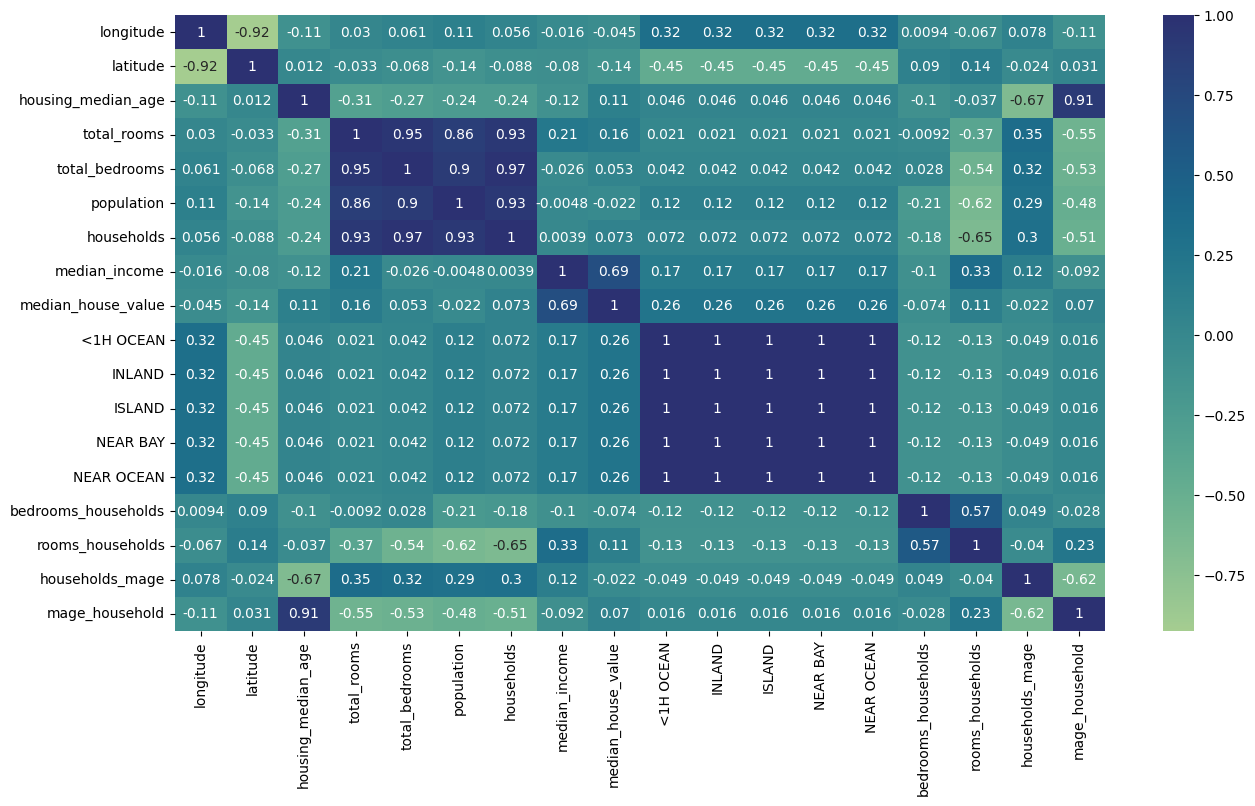

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap= 'crest')

<Axes: xlabel='latitude', ylabel='longitude'>

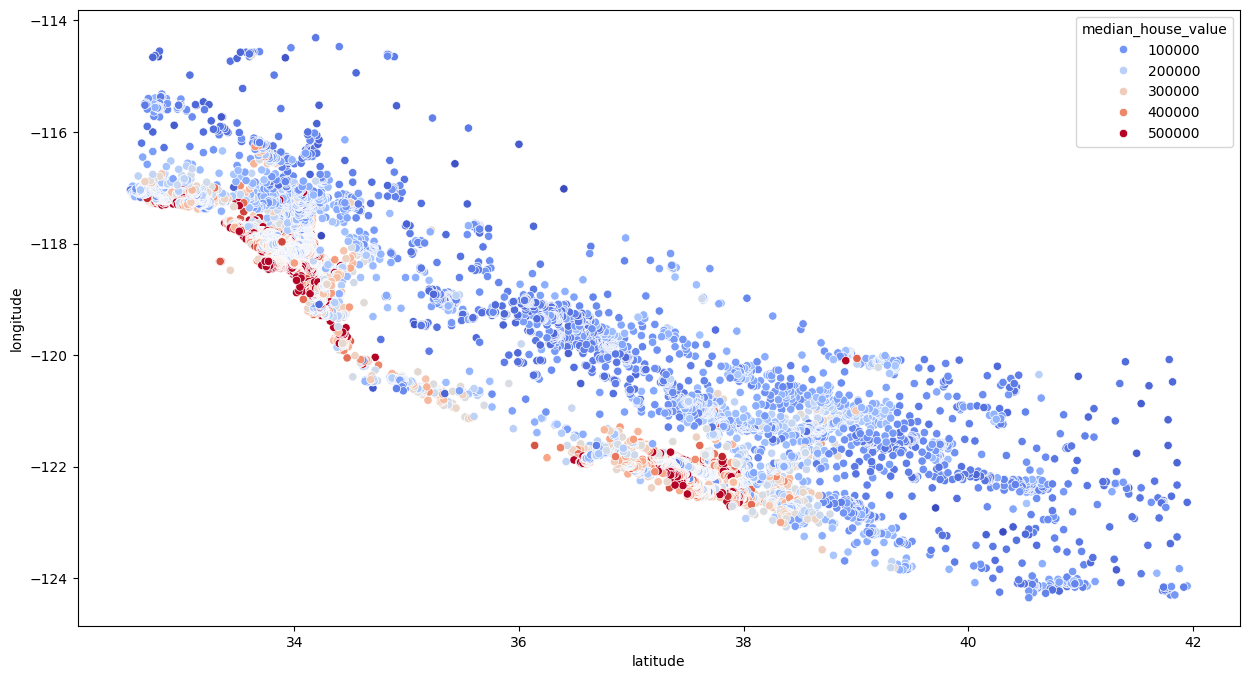

In [ ]:
# showing houses with their prices in a chart
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data = df, hue='median_house_value', palette='coolwarm')

In [ ]:
"""now we know that houses near of ocean are more expensive then all """

'now we know that houses near of ocean are more expensive then all '

# Spilit Train And Test Data

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Normalize Data

In [ ]:
x['<1H OCEAN'] = x['<1H OCEAN'] * 1
x['INLAND'] = x['<1H OCEAN'] * 1
x['ISLAND'] = x['<1H OCEAN'] * 1
x['NEAR BAY'] = x['<1H OCEAN'] * 1
x['NEAR OCEAN'] = x['<1H OCEAN'] * 1

In [ ]:
x_train['<1H OCEAN'] = x_train['<1H OCEAN'] * 1
x_train['INLAND'] = x_train['<1H OCEAN'] * 1
x_train['ISLAND'] = x_train['<1H OCEAN'] * 1
x_train['NEAR BAY'] = x_train['<1H OCEAN'] * 1
x_train['NEAR OCEAN'] = x_train['<1H OCEAN'] * 1

In [ ]:
x_test['<1H OCEAN'] = x_test['<1H OCEAN'] * 1
x_test['INLAND'] = x_test['<1H OCEAN'] * 1
x_test['ISLAND'] = x_test['<1H OCEAN'] * 1
x_test['NEAR BAY'] = x_test['<1H OCEAN'] * 1
x_test['NEAR OCEAN'] = x_test['<1H OCEAN'] * 1


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)
x


array([[-1.32731375,  1.05171726,  0.98216331, ..., -0.8902391 ,
        -0.8902391 , -0.8902391 ],
       [-1.32232256,  1.04235526, -0.60621017, ..., -0.8902391 ,
        -0.8902391 , -0.8902391 ],
       [-1.33230494,  1.03767426,  1.85576873, ..., -0.8902391 ,
        -0.8902391 , -0.8902391 ],
       ...,
       [-0.82320322,  1.77727236, -0.92388486, ..., -0.8902391 ,
        -0.8902391 , -0.8902391 ],
       [-0.87311515,  1.77727236, -0.84446619, ..., -0.8902391 ,
        -0.8902391 , -0.8902391 ],
       [-0.83318561,  1.74918635, -1.00330353, ..., -0.8902391 ,
        -0.8902391 , -0.8902391 ]])

## Train Model

In [ ]:
# i use random forest regressor
from sklearn.ensemble import RandomForestRegressor
# train and fit our model
model = RandomForestRegressor(n_estimators=300)
model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=300)

In [ ]:
y_predict_train = model.predict(x_train)
y_predict_test = model.predict(x_test)

# Score

In [ ]:
from sklearn.metrics import r2_score

score_train = r2_score(y_train, y_predict_train)
score_test = r2_score(y_test, y_predict_test)

score_train*100, score_test*100

(97.50705257132117, 82.08121647573898)

# Find Best Score

In [ ]:
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300]
}

grid_search = GridSearchCV(model, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)
grid_search.fit(x_test, y_test)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(n_estimators=300)